In [139]:
import statistics
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Explanatory Data Analysis

In [140]:
df = pd.read_csv('livability_index.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   province            102 non-null    object 
 1   year                102 non-null    int64  
 2   health_index        102 non-null    float64
 3   living_cost_mean    99 non-null     float64
 4   living_cost_stddev  99 non-null     float64
 5   polution            102 non-null    float64
 6   crime_rate          102 non-null    int64  
 7   purchasing_power    102 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 6.5+ KB


Missing values
province              0
year                  0
health_index          0
living_cost_mean      3
living_cost_stddev    3
polution              0
crime_rate            0
purchasing_power      0
dtype: int64


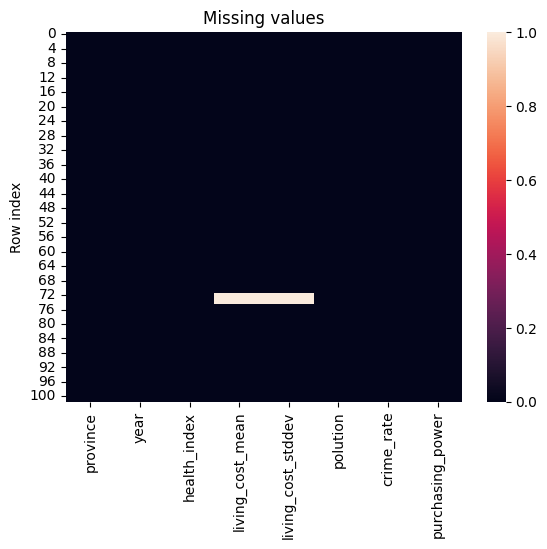

In [141]:
sns.heatmap(df.isnull())
print('Missing values')
print(df.isnull().sum())
plt.title('Missing values')
plt.ylabel('Row index')
plt.show()

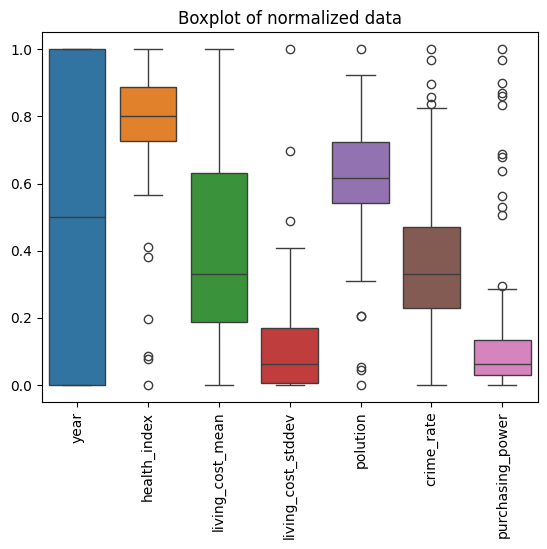

In [142]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])

sns.boxplot(data=df_normalized)
plt.title('Boxplot of normalized data')
plt.xticks(rotation=90)
plt.show()

# Preprocessing

In [143]:
df = pd.read_csv("livability_index.csv")
scaler = StandardScaler()

def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    df['living_cost'] = df['living_cost_mean'] + df['living_cost_stddev']
    df = df.drop(columns=['living_cost_mean', 'living_cost_stddev'])
    df['living_cost'] = df['living_cost'].fillna(df['living_cost'].mean())

    provinces = df['province']
    years = df['year']
    df = df.drop(columns=['province', 'year'])
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    n_components = 1
    pca = PCA(n_components=n_components)
    df = pd.DataFrame(pca.fit_transform(df), columns=['PC' + str(i) for i in range(1, n_components + 1)])

    df['province'] = provinces
    df['year'] = years

    return df

df = preprocess(df)

# KMeans

In [144]:
mean_distances = []
silhouette_scores = []
clusters = []
for i in range(2, 11):
    model = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    model.fit_predict(df.drop(columns=['province', 'year']))
    mean_distances.append(model.inertia_)
    silhouette_scores.append(silhouette_score(df.drop(columns=['province', 'year']), model.labels_))

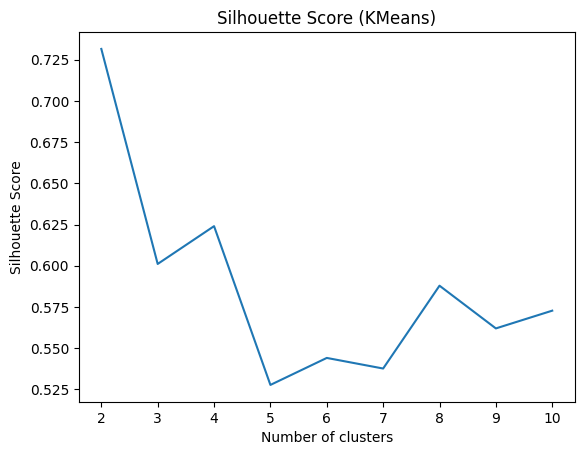

[0.7315822836705044,
 0.6010981685526425,
 0.6240340882285966,
 0.5276930026002703,
 0.5440718006369819,
 0.5376416976664602,
 0.5879088125521466,
 0.5619838910545442,
 0.5727530749533878]

Mean: 0.5876407577683928


In [145]:
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score (KMeans)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

display(silhouette_scores)
print(f'Mean: {statistics.mean(silhouette_scores)}')

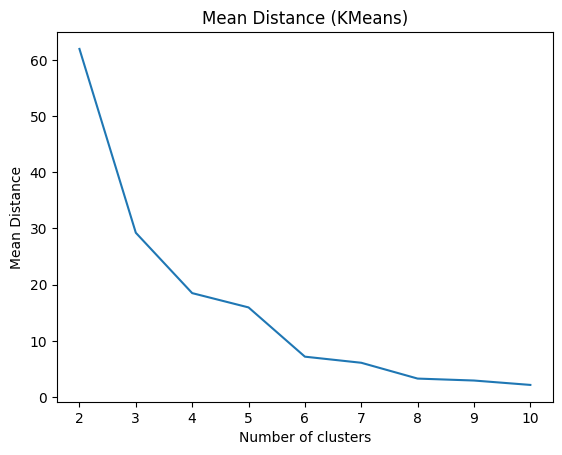

[61.93746538193825,
 29.235702757986417,
 18.495336539450847,
 15.95072918480404,
 7.18878223543609,
 6.104646847645116,
 3.2912686317850013,
 2.9454187053008574,
 2.1638275761615606]

Mean: 16.3681308733898


In [146]:
plt.plot(range(2, 11), mean_distances)
plt.title('Mean Distance (KMeans)')
plt.xlabel('Number of clusters')
plt.ylabel('Mean Distance')
plt.show()

display(mean_distances)
print(f'Mean: {statistics.mean(mean_distances)}')

# KMedoids

In [147]:
mean_distances = []
silhouette_scores = []
for i in range(2, 11):
    model = KMedoids(n_clusters=i, init = 'k-medoids++', random_state=42)
    model.fit_predict(df.drop(columns=['province', 'year']))
    mean_distances.append(model.inertia_)
    silhouette_scores.append(silhouette_score(df.drop(columns=['province', 'year']), model.labels_))

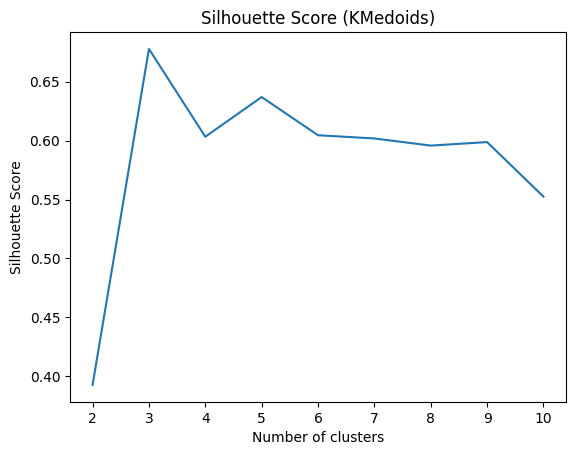

[0.3927723125242694,
 0.6777316479995559,
 0.6032590854381636,
 0.6369186281913697,
 0.6045252571808282,
 0.6017901610081536,
 0.5957514795023087,
 0.5987165332729075,
 0.5524428139499076]

Mean: 0.5848786576741627


In [148]:
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score (KMedoids)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

display(silhouette_scores)
print(f'Mean: {statistics.mean(silhouette_scores)}')

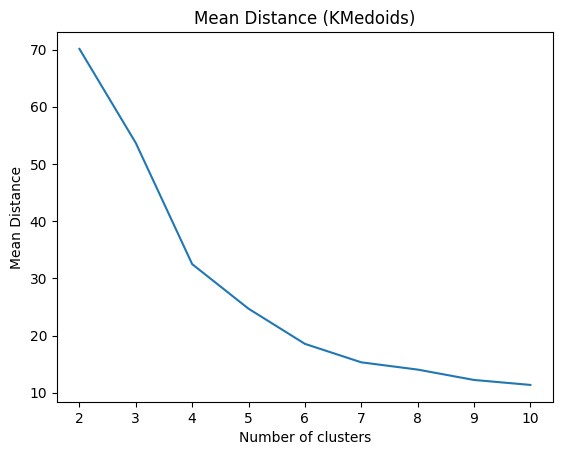

[70.11382157662325,
 53.662802299699855,
 32.48237548019192,
 24.687927939868263,
 18.543053263473634,
 15.311269377860347,
 14.04303361851563,
 12.228780195425001,
 11.360413565005949]

Mean: 28.048164146295985


In [149]:
plt.plot(range(2, 11), mean_distances)
plt.title('Mean Distance (KMedoids)')
plt.xlabel('Number of clusters')
plt.ylabel('Mean Distance')
plt.show()

display(mean_distances)
print(f'Mean: {statistics.mean(mean_distances)}')

# Cluster Characteristic Analysis

In [150]:
model = KMeans(n_clusters=3, init='k-means++', random_state=42)
df = pd.read_csv("livability_index.csv")

df['cluster'] = model.fit_predict(preprocess(df).drop(columns=['province', 'year']))
df['living_cost'] = df['living_cost_mean'] + df['living_cost_stddev']
df = df.drop(columns=['living_cost_mean', 'living_cost_stddev'])
df['living_cost'] = df['living_cost'].fillna(df['living_cost'].mean())

print(df.groupby('cluster').size())
df.drop(columns=['year', 'province']).groupby('cluster').mean()

cluster
0    61
1    15
2    26
dtype: int64


,health_index,polution,crime_rate,purchasing_power,living_cost
cluster,,,,,
0,80.198525,71.911475,138.836066,5415.588361,108.038525
1,81.080667,62.782667,85.533333,38181.200667,108.309333
2,71.049231,77.968462,197.769231,2411.903462,108.697261


In [151]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)